<h1>Aircraft Type Classification and Identification with VGG-16 Pre-Trained Model.<h1>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Dense
from keras._tf_keras.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from PIL import Image

In [2]:
#Define the train and test image paths
train_path = "airplanes/Train/"
test_path = "airplanes/Test/"

In [3]:
#Load any airplane image to test path
img = load_img(train_path + "F-22/14-21.jpg")

In [4]:
#Check size of the img
print(img_to_array(img).shape)

(348, 411, 3)


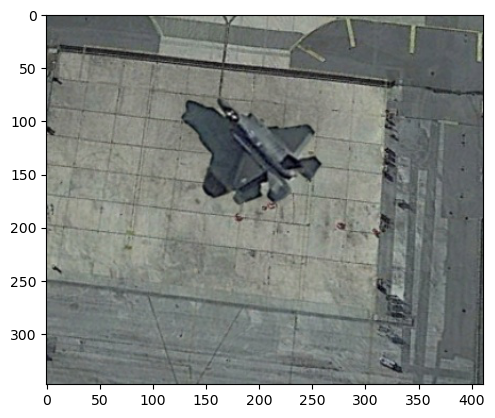

In [5]:
#Lets see the airplane
plt.imshow(img)
plt.show()

In [6]:
#Buil the tain and test datasets from dir.
train_data = ImageDataGenerator().flow_from_directory(train_path, target_size = (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_path, target_size = (224,224))

Found 1812 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [7]:
number_of_types = 5

In [8]:
#Building the model
vgg = VGG16()

In [9]:
vgg_layers = vgg.layers
print(vgg_layers)

[<InputLayer name=input_layer, built=True>, <Conv2D name=block1_conv1, built=True>, <Conv2D name=block1_conv2, built=True>, <MaxPooling2D name=block1_pool, built=True>, <Conv2D name=block2_conv1, built=True>, <Conv2D name=block2_conv2, built=True>, <MaxPooling2D name=block2_pool, built=True>, <Conv2D name=block3_conv1, built=True>, <Conv2D name=block3_conv2, built=True>, <Conv2D name=block3_conv3, built=True>, <MaxPooling2D name=block3_pool, built=True>, <Conv2D name=block4_conv1, built=True>, <Conv2D name=block4_conv2, built=True>, <Conv2D name=block4_conv3, built=True>, <MaxPooling2D name=block4_pool, built=True>, <Conv2D name=block5_conv1, built=True>, <Conv2D name=block5_conv2, built=True>, <Conv2D name=block5_conv3, built=True>, <MaxPooling2D name=block5_pool, built=True>, <Flatten name=flatten, built=True>, <Dense name=fc1, built=True>, <Dense name=fc2, built=True>, <Dense name=predictions, built=True>]


In [10]:
#Add all layers from vgg to our model 
#ignore the output layer
model_layers = len(vgg_layers) -1

model = Sequential()
for i in range(model_layers):
    model.add(vgg_layers[i])


In [11]:
#Don't re-train all orginal 16 layers
for layer in model.layers:
    layer.trainable = False

#Add an output layer
model.add(Dense(number_of_types, activation="softmax"))
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,281,029 (512.24 MB)

 Trainable params: 20,485 (80.02 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

None


In [12]:
#Compile the model
model.compile(loss= "categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [13]:
batch_size =4

model.fit(train_data, steps_per_epoch=400//batch_size,
                    epochs=3,
                    validation_data=test_data,
                    validation_steps=200//batch_size)


Epoch 1/3


/Users/halil/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 57/100 ━━━━━━━━━━━━━━━━━━━━ 7:52 11s/step - accuracy: 0.6421 - loss: 1.3954

2024-08-19 15:07:55.297725: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/halil/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 665s 7s/step - accuracy: 0.7144 - loss: 1.0800 - val_accuracy: 0.9100 - val_loss: 0.2345
Epoch 2/3


2024-08-19 15:08:31.436427: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 57/100 ━━━━━━━━━━━━━━━━━━━━ 9:05 13s/step - accuracy: 0.9719 - loss: 0.1010

2024-08-19 15:20:34.911772: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 764s 8s/step - accuracy: 0.9700 - loss: 0.1051 - val_accuracy: 0.9400 - val_loss: 0.2002
Epoch 3/3


2024-08-19 15:21:15.877155: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 57/100 ━━━━━━━━━━━━━━━━━━━━ 8:20 12s/step - accuracy: 0.9847 - loss: 0.0466

2024-08-19 15:32:21.973488: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 707s 7s/step - accuracy: 0.9849 - loss: 0.0460 - val_accuracy: 0.9300 - val_loss: 0.2328


2024-08-19 15:33:02.593169: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [16]:
#Lpoad an iarcraft image and rescale it to the resolution
pre1 = Image.open("pre1_f22.jpg").resize((224,224))
pre1 = np.array(pre1)
pre1.shape

(224, 224, 3)

In [17]:
print(pre1.ndim)

3


In [18]:
pre1 = pre1.reshape(-1, 224,224,3)

In [19]:
print(pre1.shape)
print(pre1.ndim)

(1, 224, 224, 3)
4


In [20]:
img=preprocess_input(pre1)

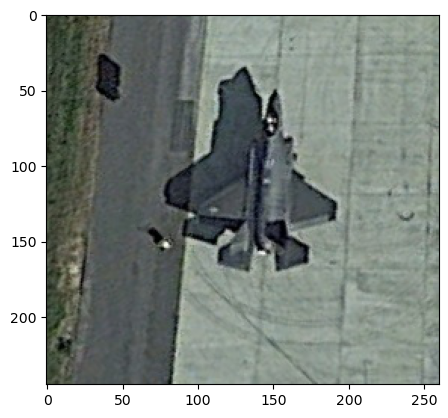

In [21]:
img_for_display = load_img("pre1_f22.jpg")
plt.imshow(img_for_display)
plt.show()

In [22]:
preds = model.predict(pre1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step


In [23]:
preds

array([[3.9360231e-05, 1.6597389e-04, 3.6609356e-06, 9.9965858e-01,
        1.3242729e-04]], dtype=float32)

In [24]:
img_classes = ["A-10", "B-52", "E-3", "F-22", "KC-10"]
result = np.argmax(preds[0])
print(img_classes[result])

F-22
